In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from keras.utils import image_dataset_from_directory, plot_model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten
from keras.metrics import SparseTopKCategoricalAccuracy
from keras.callbacks import EarlyStopping

In [34]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [35]:
img_dims = (256, 256)
batch_size = 32
n_inputs = img_dims[0] * img_dims[1] * 3

train = image_dataset_from_directory(
    directory='cards/train',
    image_size=img_dims,
    batch_size=batch_size
)

val = image_dataset_from_directory(
    directory='cards/valid',
    image_size=img_dims,
    batch_size=batch_size
)

test = image_dataset_from_directory(
    directory='cards/test',
    image_size=img_dims,
    batch_size=batch_size
)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [36]:
model3 = Sequential()


model3.add(Conv2D(
    filters=32,                     
    kernel_size=(3, 3),             
    activation='relu',              
    input_shape=img_dims + (3,),
    data_format="channels_last"
))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(
    filters=32,                     
    kernel_size=(3, 3),             
    activation='relu',              
    use_bias=True                   
))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.2))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(53, activation='softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 123008)           

In [37]:
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3, name = 'Top3')]
)

callbacks = [
    EarlyStopping(
        monitor="accuracy",
        min_delta=1e-4,
        patience=3,
        verbose=1,
    )
]

history3 = model3.fit(
    train,
    validation_data = val,
    epochs = 10000,
    callbacks = callbacks
)

Epoch 1/10000
239/239 [==============================] - 79s 302ms/step - loss: 64.0537 - accuracy: 0.0737 - Top3: 0.1654 - val_loss: 3.4428 - val_accuracy: 0.1811 - val_Top3: 0.3358
Epoch 2/10000
239/239 [==============================] - 18s 76ms/step - loss: 2.9302 - accuracy: 0.2792 - Top3: 0.4275 - val_loss: 3.4660 - val_accuracy: 0.2679 - val_Top3: 0.4189
Epoch 3/10000
239/239 [==============================] - 20s 83ms/step - loss: 2.0293 - accuracy: 0.4979 - Top3: 0.6127 - val_loss: 3.5644 - val_accuracy: 0.3170 - val_Top3: 0.4377
Epoch 4/10000
239/239 [==============================] - 21s 85ms/step - loss: 1.4995 - accuracy: 0.6283 - Top3: 0.7141 - val_loss: 3.9438 - val_accuracy: 0.3019 - val_Top3: 0.4679
Epoch 5/10000
239/239 [==============================] - 21s 88ms/step - loss: 1.2743 - accuracy: 0.6763 - Top3: 0.7583 - val_loss: 4.0544 - val_accuracy: 0.2943 - val_Top3: 0.4075
Epoch 6/10000
239/239 [==============================] - 23s 97ms/step - loss: 1.2255 - accur

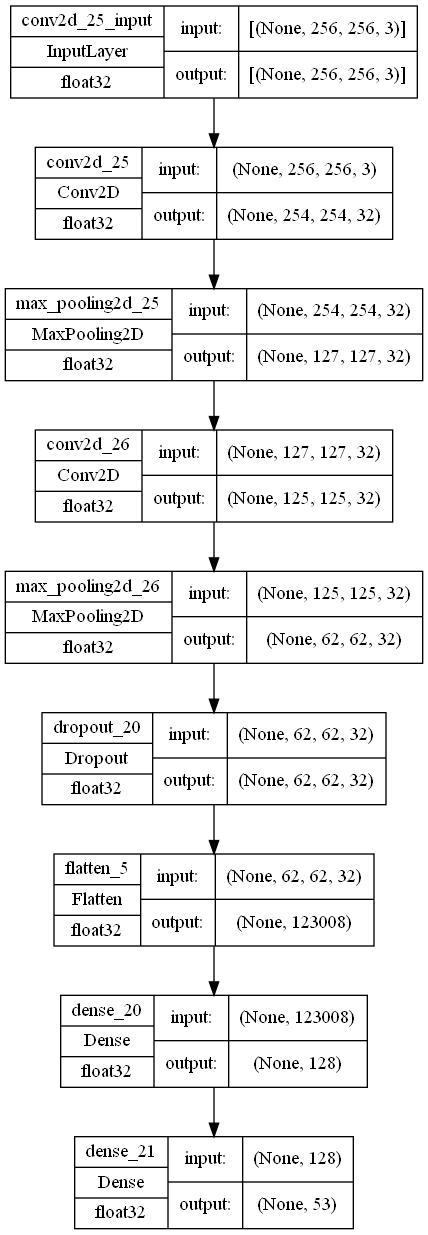

In [38]:
plot_model(
    model3,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
)

In [39]:
model3.evaluate(test)

9/9 [==============================] - 1s 30ms/step - loss: 7.1823 - accuracy: 0.4491 - Top3: 0.6151


[7.1822733879089355, 0.44905659556388855, 0.6150943636894226]

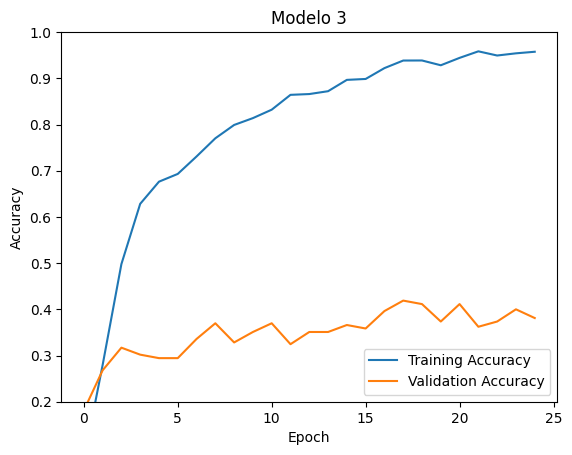

In [42]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Modelo 3')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

In [41]:
model3.save_weights(input('Nombre: ')+'.h5', overwrite=True)